In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from alg_functions import *

In [3]:
%pip install astroML


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Obtain the Data

In [4]:
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

# Create a DataFrame from the array X
df = pd.DataFrame(X[:,0:2], columns=['u-g', 'g-r'])

# Add the array y as a new column to the DataFrame
df['type'] = np.where(y==0, 'stars', 'RR-Lyrae')

pred_columns_lyrae = ['u-g', 'g-r']

display(df.head())

,u-g,g-r,type
0,1.028999,0.379000,stars
1,0.945000,0.305000,stars
2,1.118000,0.396000,stars
3,0.962000,0.375000,stars
4,1.052000,0.335001,stars


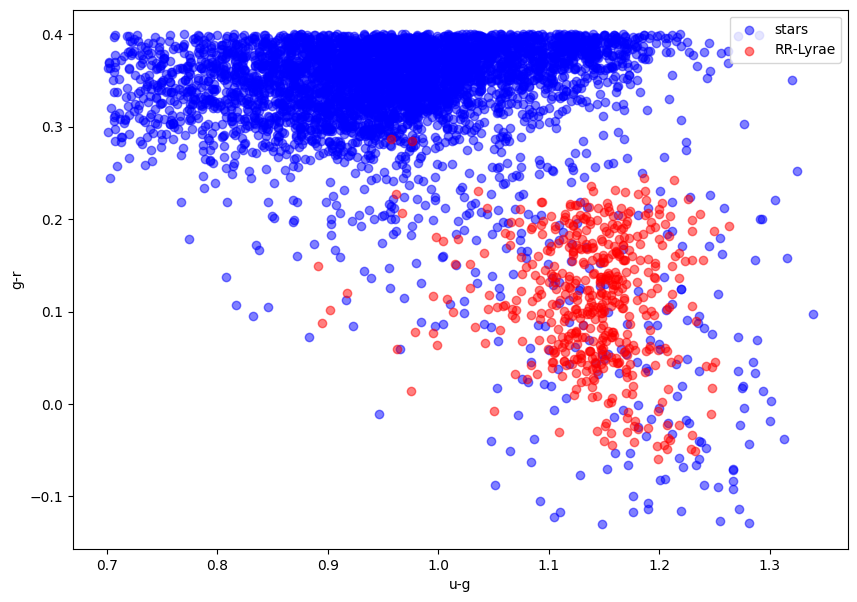

In [5]:
stars_df = df[df['type'] == 'stars']
rrlyrae_df = df[df['type'] == 'RR-Lyrae']

pred_columns_lyrae = ['u-g', 'g-r']

plt.figure(figsize=(10, 7))

plt.scatter(stars_df['u-g'], stars_df['g-r'], c='b', label='stars', alpha=0.5)
plt.scatter(rrlyrae_df['u-g'], rrlyrae_df['g-r'], c='r', label='RR-Lyrae', alpha=0.5)

plt.legend(loc='upper right')

plt.xlabel('u-g')
plt.ylabel('g-r')

plt.show()

# Algorithm 1

In [6]:
for epsilon in [0.01, 0.001, 0.0001]:

    pred_columns_lyrae = ['u-g', 'g-r']

    print('---------------')
    print('Epsilon: ', epsilon)

    # Run the Away Step Frank-Wolfe algorithm
    c, r, k, chi, timer, delta, core_size = frank_wolfe_alg_MEB(epsilon, df[df['type'] == 'RR-Lyrae'][pred_columns_lyrae].values)

    # Calculate Accuracies
    distances = np.linalg.norm(df[pred_columns_lyrae] - c, axis=1)
    df['InsideBall'] = distances < r
    print(measure_accuracy('stars', 'RR-Lyrae', df))

---------------
Epsilon:  0.01
Center: [1.09525934 0.11722551]
Radius: 0.2189510675900554
Iterations: 95
CPU time: 0.14354205131530762
Core Set Size: 4
                Metric        Count
0   True Positive (TP)   483.000000
1  False Negative (FN)     0.000000
2   True Negative (TN)  4056.000000
3  False Positive (FP)   461.000000
4            Precision     0.511653
5               Recall     1.000000
6             F1 Score     0.676945
---------------
Epsilon:  0.001
Center: [1.09443828 0.11809094]
Radius: 0.21797937143902912
Iterations: 996
CPU time: 1.3313210010528564
Core Set Size: 4
                Metric        Count
0   True Positive (TP)   482.000000
1  False Negative (FN)     1.000000
2   True Negative (TN)  4055.000000
3  False Positive (FP)   462.000000
4            Precision     0.510593
5               Recall     0.997930
6             F1 Score     0.675543
---------------
Epsilon:  0.0001
Center: [1.09443863 0.11809045]
Radius: 0.21797877329853305
Iterations: 1000
CPU time

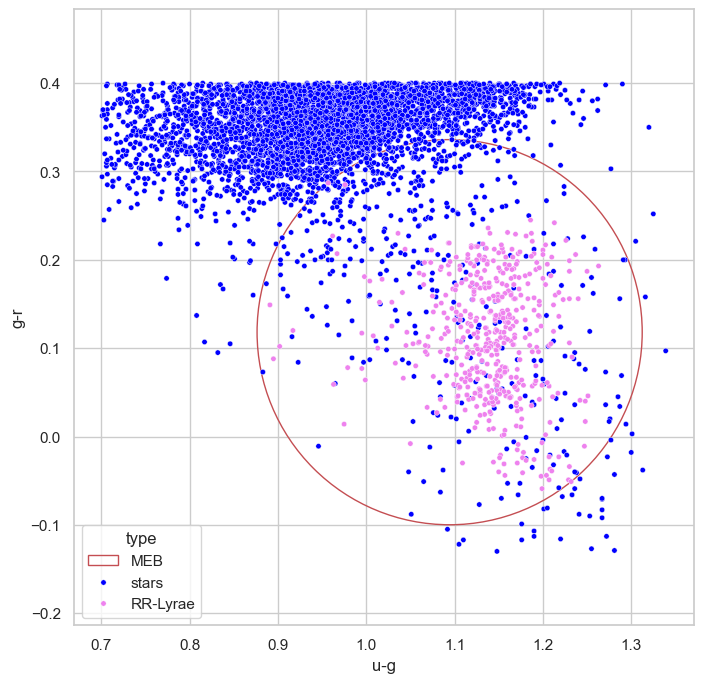

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

circle = plt.Circle(tuple(c), r, color='r', fill=False, label='MEB')

sns.set(style="whitegrid")

plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.cla()
ax.add_patch(circle)

sns.scatterplot(data=df, x='u-g', y='g-r', hue='type', palette={'RR-Lyrae': 'violet', 'stars': 'blue'}, s=15)

plt.xlim(df['u-g'].min() - 0.1, df['u-g'].max() + 0.1)
plt.ylim(df['g-r'].min() - 0.1, df['g-r'].max() + 0.1)

plt.axis('equal')

plt.show()

# Algorithm 2

In [8]:
for epsilon in [0.01, 0.001, 0.0001]:

    pred_columns_lyrae = ['u-g', 'g-r']

    print('---------------')
    print('Epsilon: ', epsilon)

    # Run the Away Step Frank-Wolfe algorithm
    center_as, radius_as, count_iterations_as, CPU_time_as, dual_val_list_as, dual_gap_list_as, core_size_as = frankWolfe_AwayStep(df[df['type'] == 'RR-Lyrae'][pred_columns_lyrae].values, epsilon)

    # Calculate Accuracies
    distances = np.linalg.norm(df[pred_columns_lyrae] - center_as, axis=1)
    df['InsideBall'] = distances < radius_as
    print(measure_accuracy('stars', 'RR-Lyrae', df))

---------------
Epsilon:  0.01
Center: [1.06442206 0.10379833]
Radius: 0.2123746080725192
Iterations: 6
CPU time: 0.04398393630981445
Set Size: 3
                Metric        Count
0   True Positive (TP)   478.000000
1  False Negative (FN)     5.000000
2   True Negative (TN)  4145.000000
3  False Positive (FP)   372.000000
4            Precision     0.562353
5               Recall     0.989648
6             F1 Score     0.717179
---------------
Epsilon:  0.001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.0359959602355957
Set Size: 2
                Metric        Count
0   True Positive (TP)   481.000000
1  False Negative (FN)     2.000000
2   True Negative (TN)  4059.000000
3  False Positive (FP)   458.000000
4            Precision     0.512247
5               Recall     0.995859
6             F1 Score     0.676512
---------------
Epsilon:  0.0001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.030675888061

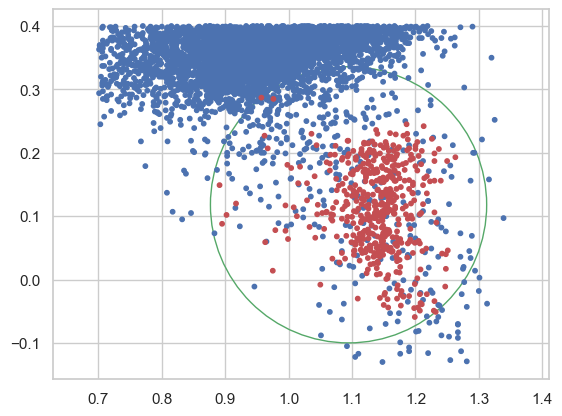

In [9]:
circle = plt.Circle(tuple(center_as), radius_as, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

# Algorithm 3

In [10]:
for epsilon in [0.01, 0.001, 0.0001]:

    pred_columns_lyrae = ['u-g', 'g-r']

    print('---------------')
    print('Epsilon: ', epsilon)

    # Run the Pairwise Frank-Wolfe algorithm
    center_pw, radius_pw, count_iterations_pw, CPU_time_pw, dual_val_list_pw, dual_gap_list_pw, core_size_pw = frankWolfe_Pairwise(df[df['type'] == 'RR-Lyrae'][pred_columns_lyrae].values, epsilon)

    # Calculate Accuracies
    distances = np.linalg.norm(df[pred_columns_lyrae] - center_pw, axis=1)
    df['InsideBall'] = distances < radius_pw
    print(measure_accuracy('stars', 'RR-Lyrae', df))

---------------
Epsilon:  0.01
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.02790093421936035
Set Size: 2
                Metric        Count
0   True Positive (TP)   481.000000
1  False Negative (FN)     2.000000
2   True Negative (TN)  4059.000000
3  False Positive (FP)   458.000000
4            Precision     0.512247
5               Recall     0.995859
6             F1 Score     0.676512
---------------
Epsilon:  0.001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.02470684051513672
Set Size: 2
                Metric        Count
0   True Positive (TP)   481.000000
1  False Negative (FN)     2.000000
2   True Negative (TN)  4059.000000
3  False Positive (FP)   458.000000
4            Precision     0.512247
5               Recall     0.995859
6             F1 Score     0.676512
---------------
Epsilon:  0.0001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.0157411098

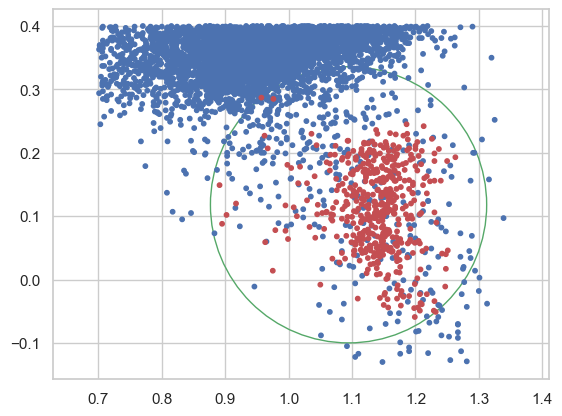

In [11]:
circle = plt.Circle(tuple(center_pw), radius_pw, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

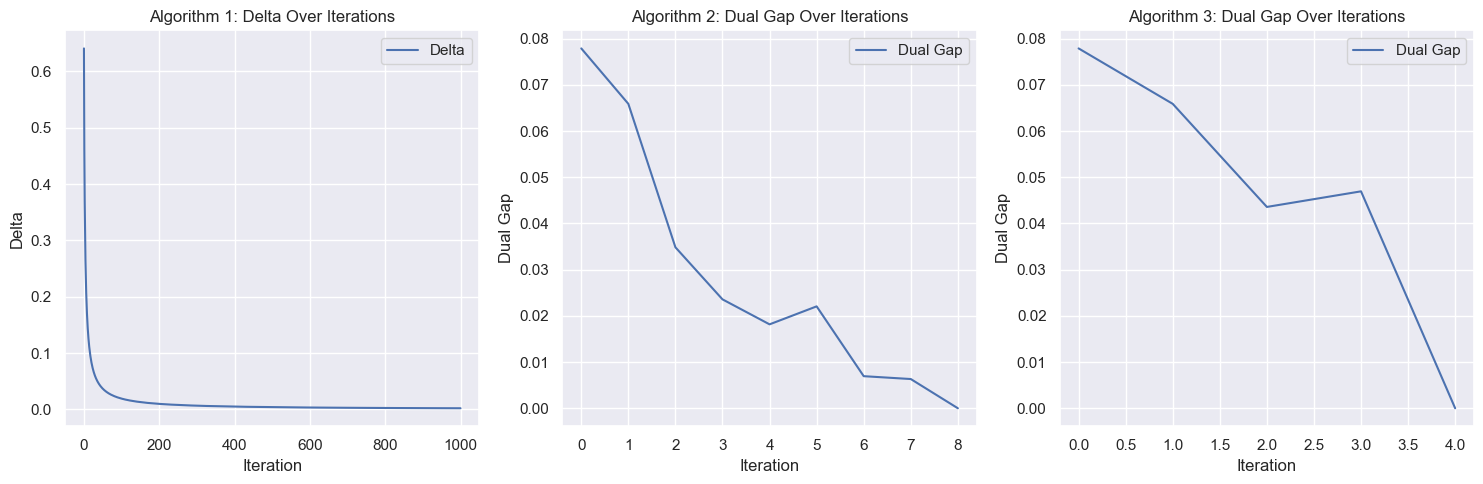

In [12]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.lineplot(ax=axs[0], data=delta, color='b', label='Delta')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Delta')
axs[0].set_title('Algorithm 1: Delta Over Iterations')

sns.lineplot(ax=axs[1], data=dual_gap_list_as, color='b', label='Dual Gap')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Dual Gap')
axs[1].set_title('Algorithm 2: Dual Gap Over Iterations')

sns.lineplot(ax=axs[2], data=dual_gap_list_pw, color='b', label='Dual Gap')

axs[2].set_xlabel('Iteration')
axs[2].set_ylabel('Dual Gap')
axs[2].set_title('Algorithm 3: Dual Gap Over Iterations')

plt.tight_layout()
plt.show()

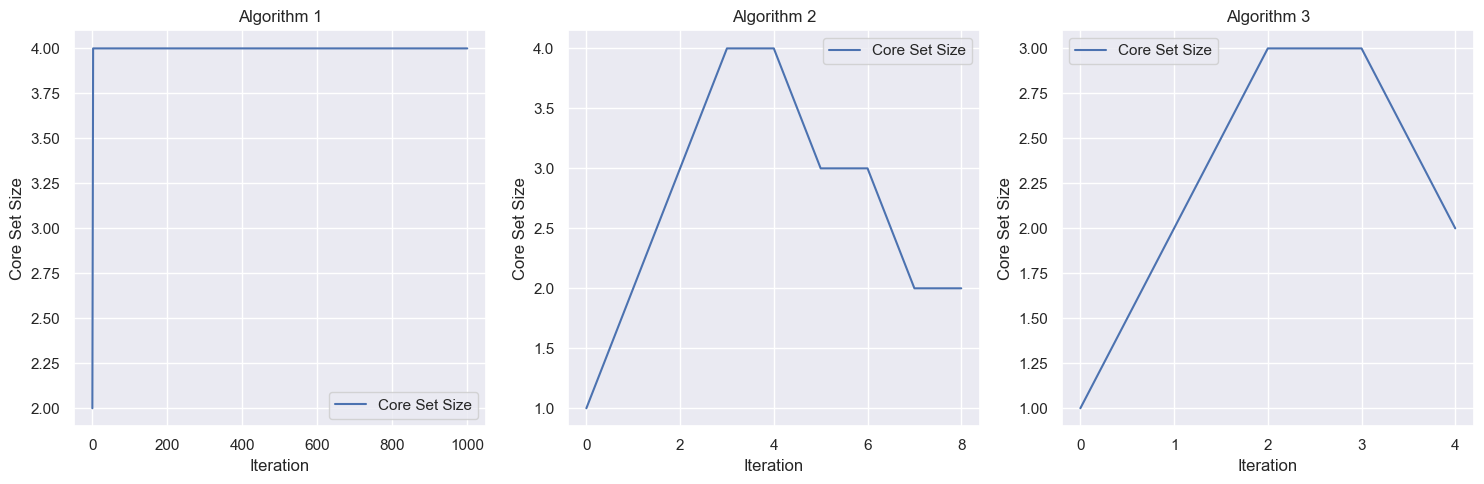

In [13]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.lineplot(ax=axs[0], data=core_size, color='b', label='Core Set Size')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Core Set Size')
axs[0].set_title('Algorithm 1')

sns.lineplot(ax=axs[1], data=core_size_as, color='b', label='Core Set Size')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Core Set Size')
axs[1].set_title('Algorithm 2')

sns.lineplot(ax=axs[2], data=core_size_pw, color='b', label='Core Set Size')

axs[2].set_xlabel('Iteration')
axs[2].set_ylabel('Core Set Size')
axs[2].set_title('Algorithm 3')

plt.tight_layout()
plt.show()